In [0]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [0]:
wine = load_wine()

In [11]:
# Наименования признаков
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
# Значения признаков
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [13]:
type(wine.data)

numpy.ndarray

In [14]:
# Значения целевого признака
np.unique(wine.target)

array([0, 1, 2])

In [15]:
# Наименования значений целевого признака
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [16]:
list(zip(np.unique(wine.target), wine.target_names))

[(0, 'class_0'), (1, 'class_1'), (2, 'class_2')]

In [17]:
# Значения целевого признака
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
# Размер выборки
wine.data.shape, wine.target.shape

((178, 13), (178,))

In [0]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [20]:
# И выведем его статистические характеристики
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [0]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)

In [22]:
# Размер обучающей выборки
wine_X_train.shape, wine_y_train.shape

((89, 13), (89,))

In [23]:
# Размер тестовой выборки
wine_X_test.shape, wine_y_test.shape

((89, 13), (89,))

In [24]:
np.unique(wine_y_train)

array([0, 1, 2])

In [26]:
np.unique(wine_y_test)

array([0, 1, 2])

In [27]:
# 2 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89, array([0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [41]:
# 3 ближайших соседа
cl1_1 = KNeighborsClassifier(n_neighbors=3)
cl1_1.fit(wine_X_train, wine_y_train)
target1_1 = cl1_1.predict(wine_X_test)
len(target1_1), target1_1

(89, array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0,
        0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0,
        1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0,
        1]))

In [42]:
# 10 ближайших соседей
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(wine_X_train, wine_y_train)
target1_2 = cl1_2.predict(wine_X_test)
len(target1_2), target1_2

(89, array([1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2,
        0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
        1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0,
        1]))

In [43]:
# 3 ближайших соседа
accuracy_score(wine_y_test, target1_1)

0.6966292134831461

In [44]:
# 10 ближайших соседей
accuracy_score(wine_y_test, target1_2)

0.6629213483146067

In [0]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:

    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [46]:
# 3 ближайших соседа
print_accuracy_score_for_classes(wine_y_test, target1_1)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.7352941176470589
2 	 0.5


In [48]:
# 10 ближайших соседей
print_accuracy_score_for_classes(wine_y_test, target1_2)

Метка 	 Accuracy
0 	 0.7878787878787878
1 	 0.8235294117647058
2 	 0.22727272727272727


In [0]:
# Конвертация целевого признака в бинарный
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

# Если целевой признак ==2, 
# то будем считать этот случай 1 в бинарном признаке
bin_wine_y_test = convert_target_to_binary(wine_y_test, 2)

# Конвертация предсказанных признаков
bin_target1_1 = convert_target_to_binary(target1_1, 2)
bin_target1_2 = convert_target_to_binary(target1_2, 2)


In [51]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_1)

0.6529850746268657

In [52]:
balanced_accuracy_score(bin_wine_y_test, bin_target1_2)

0.5390094979647219

In [53]:
confusion_matrix(bin_wine_y_test, bin_target1_1, labels=[0, 1])

array([[54, 13],
       [11, 11]])

In [55]:
tn, fp, fn, tp = confusion_matrix(bin_wine_y_test, bin_target1_1).ravel()
tn, fp, fn, tp

(54, 13, 11, 11)

In [57]:
# Пример для небинарной классификации
confusion_matrix(wine_y_test, target1_1, labels=[0, 1, 2])

array([[26,  0,  7],
       [ 3, 25,  6],
       [ 2,  9, 11]])

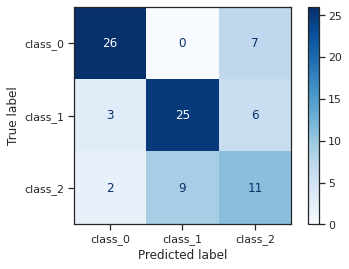

In [58]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, cmap=plt.cm.Blues)


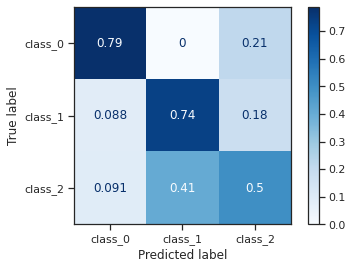

In [59]:
plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

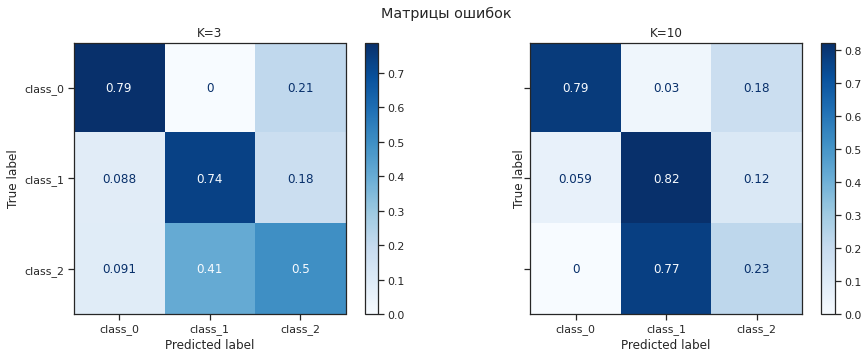

In [60]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(cl1_1, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(cl1_2, wine_X_test, wine_y_test, 
                      display_labels=wine.target_names, 
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=3')
ax[1].title.set_text('K=10')

In [61]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 3 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_1), recall_score(bin_wine_y_test, bin_target1_1)

(0.4583333333333333, 0.5)

In [62]:
# Для 10 ближайших соседей
precision_score(bin_wine_y_test, bin_target1_2), recall_score(bin_wine_y_test, bin_target1_2)

(0.3333333333333333, 0.22727272727272727)

In [63]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(wine_y_test, target1_1, average='micro')

0.6966292134831461

In [64]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(wine_y_test, target1_1, average='macro')

0.6774457094665824

In [65]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(wine_y_test, target1_1, average='weighted')

0.7051769964963152

In [66]:
f1_score(bin_wine_y_test, bin_target1_2)

0.27027027027027023

In [67]:
f1_score(wine_y_test, target1_1, average='micro')

0.6966292134831461

In [68]:
f1_score(wine_y_test, target1_1, average='macro')

0.6753516624040921

In [69]:
f1_score(wine_y_test, target1_1, average='weighted')

0.7003847093307279

In [70]:
classification_report(wine_y_test, target1_1, 
                      target_names=wine.target_names, output_dict=True)

{'accuracy': 0.6966292134831461,
 'class_0': {'f1-score': 0.8125,
  'precision': 0.8387096774193549,
  'recall': 0.7878787878787878,
  'support': 33},
 'class_1': {'f1-score': 0.735294117647059,
  'precision': 0.7352941176470589,
  'recall': 0.7352941176470589,
  'support': 34},
 'class_2': {'f1-score': 0.4782608695652174,
  'precision': 0.4583333333333333,
  'recall': 0.5,
  'support': 22},
 'macro avg': {'f1-score': 0.6753516624040921,
  'precision': 0.6774457094665824,
  'recall': 0.6743909685086157,
  'support': 89},
 'weighted avg': {'f1-score': 0.7003847093307279,
  'precision': 0.7051769964963152,
  'recall': 0.6966292134831461,
  'support': 89}}

In [71]:
fpr, tpr, thresholds = roc_curve(bin_wine_y_test, bin_target1_1, 
                                 pos_label=1)
fpr, tpr, thresholds

(array([0.        , 0.19402985, 1.        ]),
 array([0. , 0.5, 1. ]),
 array([2, 1, 0]))

In [0]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

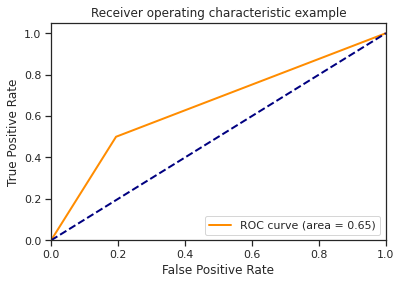

In [73]:
# Для 3 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_1, pos_label=1, average='micro')

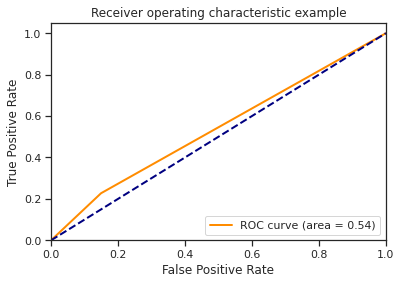

In [74]:
# Для 10 ближайших соседей
draw_roc_curve(bin_wine_y_test, bin_target1_2, pos_label=1, average='micro')

In [0]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [0]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         wine.data, wine.target, cv=3)

In [81]:
# Значение метрики accuracy для 3 фолдов
scores


array([0.61666667, 0.57627119, 0.79661017])

In [82]:
# Усредненное значение метрики accuracy для 3 фолдов
np.mean(scores)

0.6631826741996233

In [0]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [84]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        wine.data, wine.target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00085354, 0.00051498, 0.00043821]),
 'score_time': array([0.00853586, 0.00439715, 0.00407171]),
 'test_f1': array([0.60380952, 0.57731661, 0.78515946]),
 'test_precision': array([0.61631579, 0.59473992, 0.78926159]),
 'test_recall': array([0.61666667, 0.57627119, 0.79661017]),
 'train_f1': array([0.83420614, 0.87517928, 0.78484177]),
 'train_precision': array([0.84432192, 0.87868395, 0.78719633]),
 'train_recall': array([0.83050847, 0.87394958, 0.78991597])}

In [90]:
n_range = np.array(range(5,30,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
         22, 23, 24, 25, 26, 27, 28, 29])}]

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

CPU times: user 262 ms, sys: 0 ns, total: 262 ms
Wall time: 265 ms


In [95]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00079412, 0.00042229, 0.000424  , 0.00041122, 0.00042453,
        0.00041642, 0.00042357, 0.00042272, 0.00042644, 0.00042472,
        0.00041595, 0.00041776, 0.00041423, 0.00041547, 0.00041981,
        0.0004138 , 0.00041986, 0.00041375, 0.00042772, 0.00042868,
        0.00042977, 0.00041394, 0.00041647, 0.00042043, 0.00040278]),
 'mean_score_time': array([0.00209603, 0.00128002, 0.00122681, 0.00126824, 0.00124025,
        0.00131435, 0.0012342 , 0.00125484, 0.00124636, 0.00125728,
        0.0012476 , 0.00128284, 0.00126023, 0.00125666, 0.00125179,
        0.00125437, 0.00125766, 0.0013196 , 0.00127416, 0.00133877,
        0.00129719, 0.00133085, 0.00127959, 0.00134783, 0.00130792]),
 'mean_test_score': array([0.69411765, 0.67254902, 0.63856209, 0.62679739, 0.66143791,
        0.68300654, 0.70718954, 0.69607843, 0.69607843, 0.70784314,
        0.71895425, 0.71830065, 0.74052288, 0.71830065, 0.71830065,
        0.70784314, 0.69607843, 0.69607843, 0.68431373, 0

In [96]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [97]:
# Лучшее значение метрики
clf_gs.best_score_

0.7405228758169934

In [98]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 17}

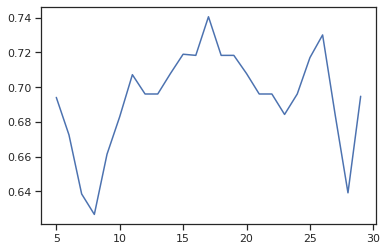

In [99]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])